# Drug Use vs. Personality
## Sydney Small
## STAT 411

In [77]:
import numpy as np
import pandas as pa
import matplotlib.pyplot as plt
import seaborn as sn

druguser = pa.read_csv("drug_consumption.csv", names = ['ID',
'Age',
'Gender',
'Education',
'Country',
'Ethnicity',
'Nscore',
'Escore',
'Oscore',
'Ascore',
'Cscore',
'Impulsive',
'SS',
'Alcohol',
'Amphet',
'Amyl',
'Benzos',
'Caff',
'Cannabis',
'Choc',
'Coke',
'Crack',
'Ecstasy',
'Heroin',
'Ketamine',
'Legalh',
'LSD',
'Meth',
'Mushrooms',
'Nicotine',
'Semer',
'VSA'])

druguser.head()

ID      Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
0   1  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1   2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2   3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3   4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4   5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   

    Oscore   Ascore  ...  Ecstasy  Heroin  Ketamine Legalh  LSD Meth  \
0 -0.58331 -0.91699  ...      CL0     CL0       CL0    CL0  CL0  CL0   
1  1.43533  0.76096  ...      CL4     CL0       CL2    CL0  CL2  CL3   
2 -0.84732 -1.62090  ...      CL0     CL0       CL0    CL0  CL0  CL0   
3 -0.01928  0.59042  ...      CL0     CL0       CL2    CL0  CL0  CL0   
4 -0.45174 -0.30172  ...      CL1     CL0       CL0    CL1  CL0  CL0   

  Mushrooms Nicotine Semer  VSA  
0       CL0      CL2   CL0  CL0  
1       CL0      CL4   CL0  CL0  
2       CL1      CL0   CL0  CL0  
3       CL0      CL2   CL0  CL0  
4       CL2      CL2   CL0  CL0  

[5 rows x 32 columns]

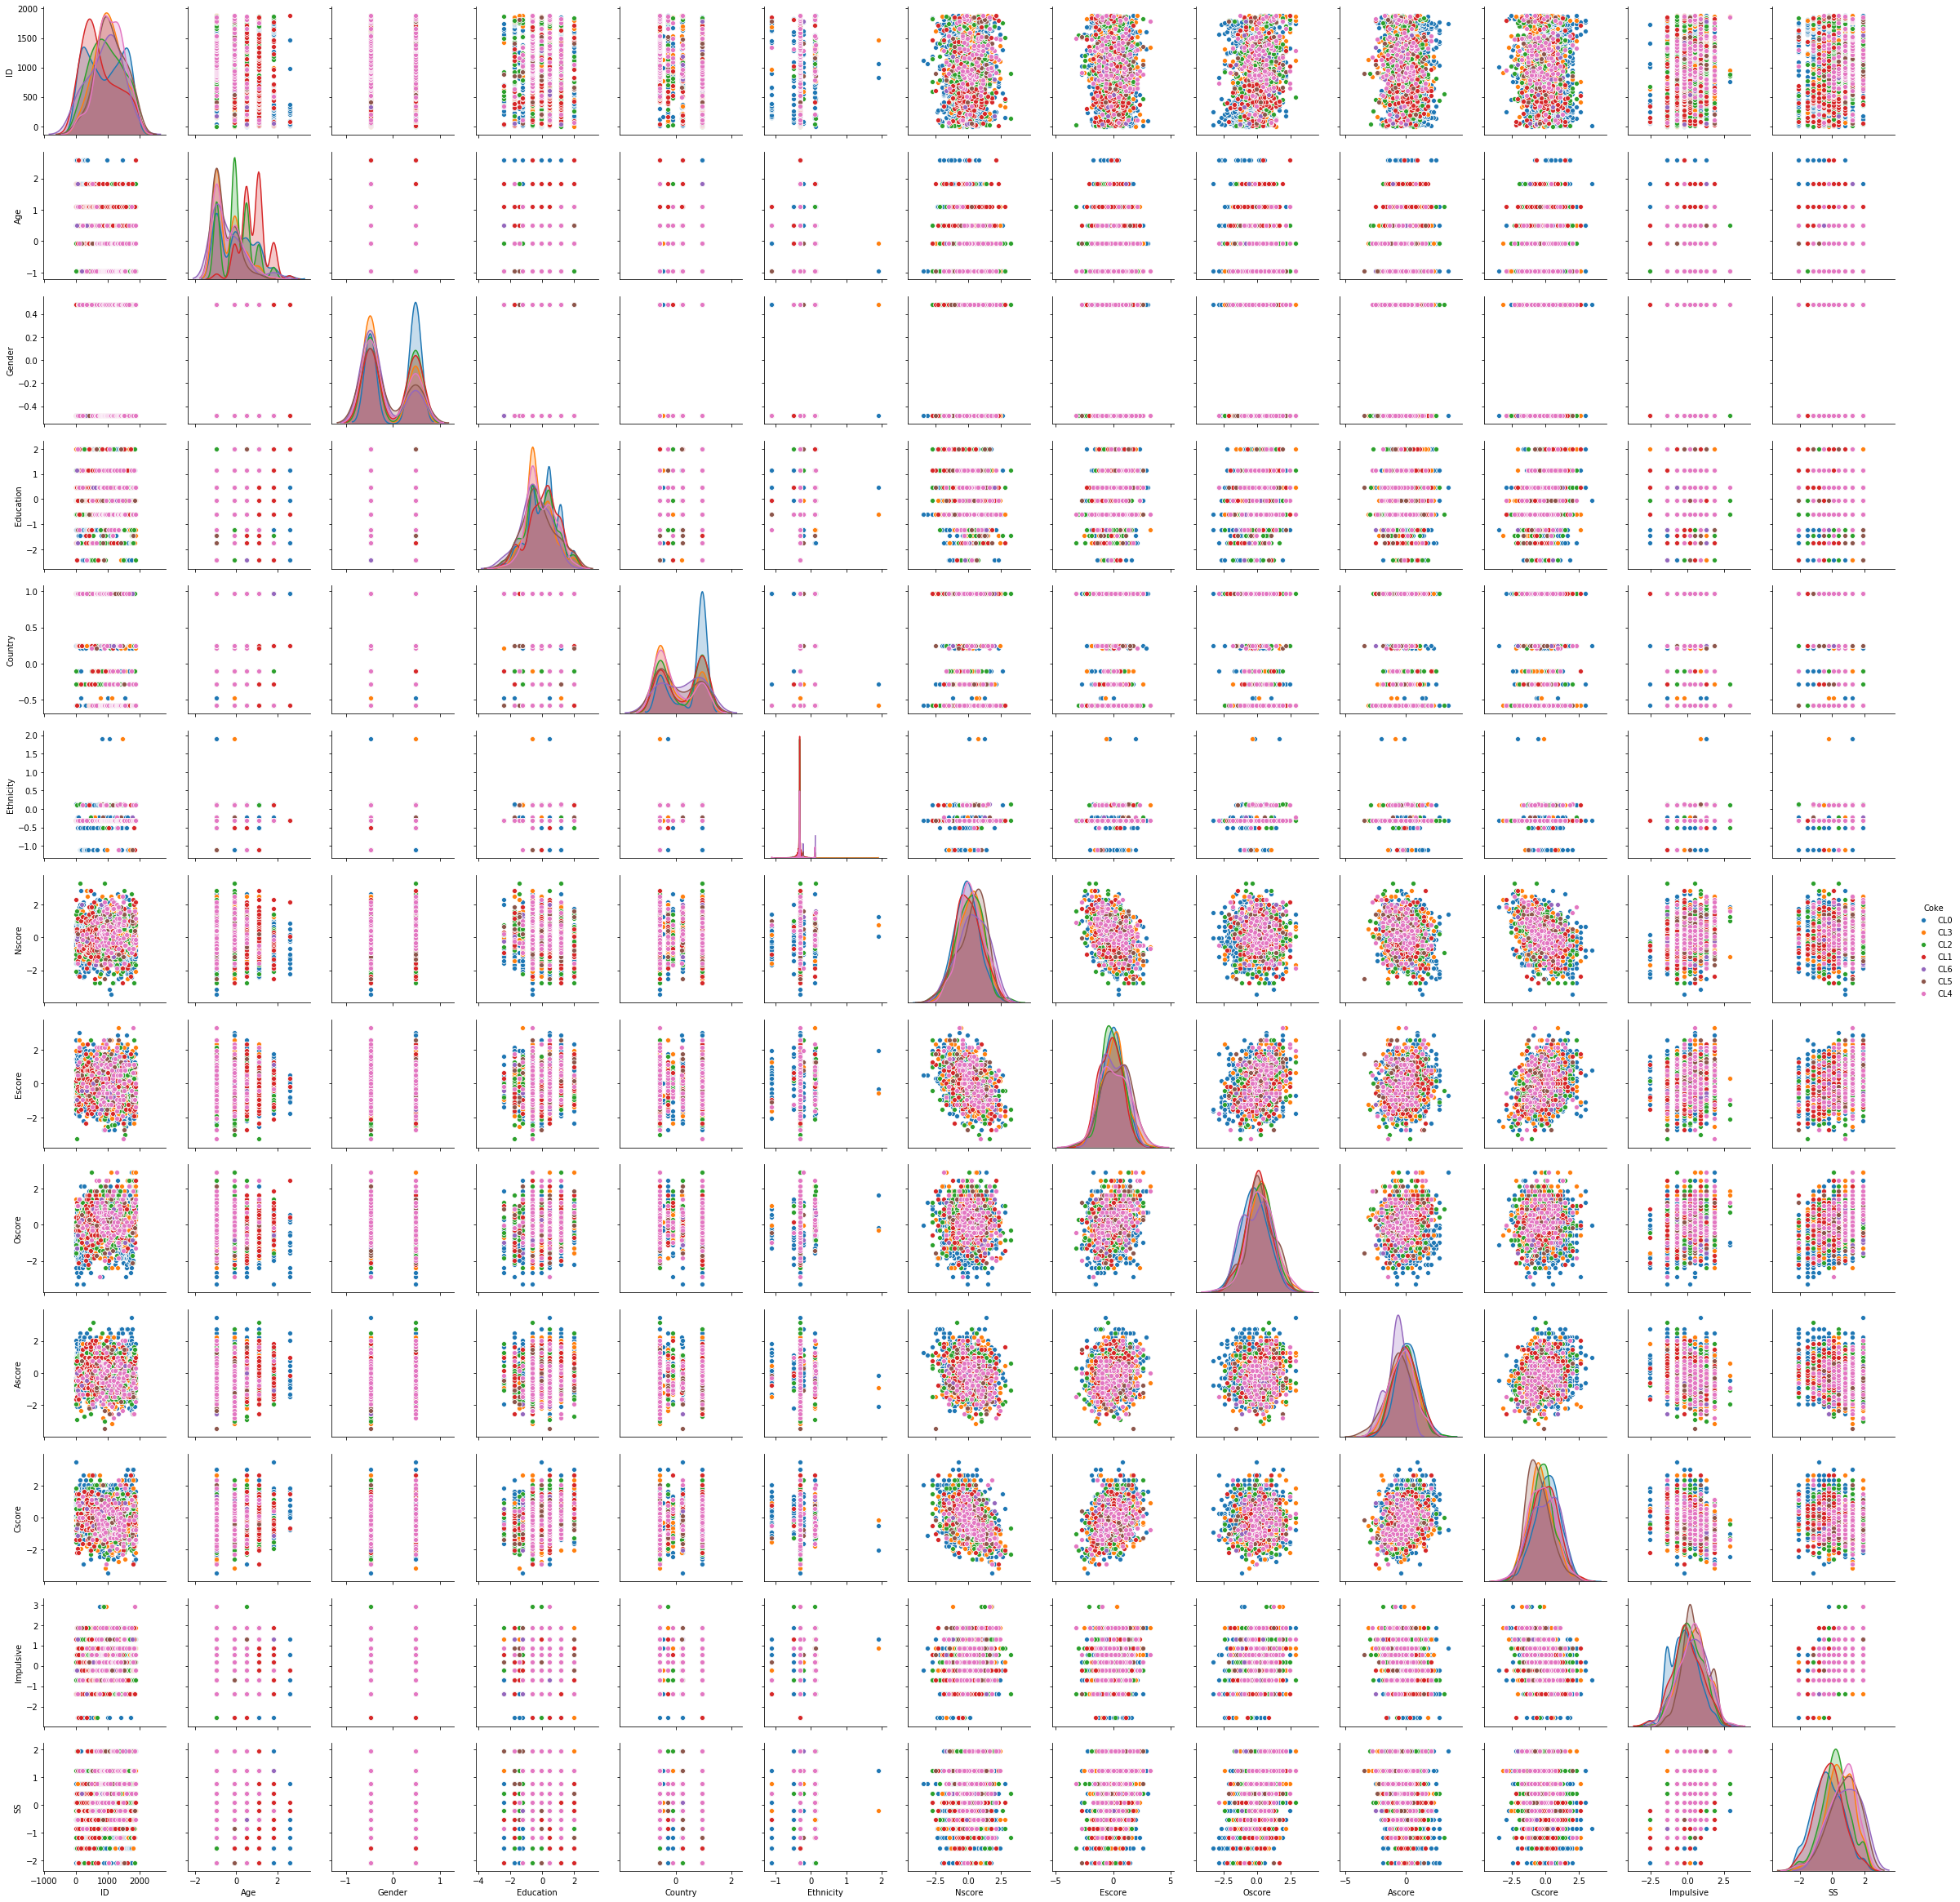

In [78]:
sn.pairplot(druguser, hue = "Coke")

In [79]:
set(druguser.Coke)

{'CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'}

//anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
//anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


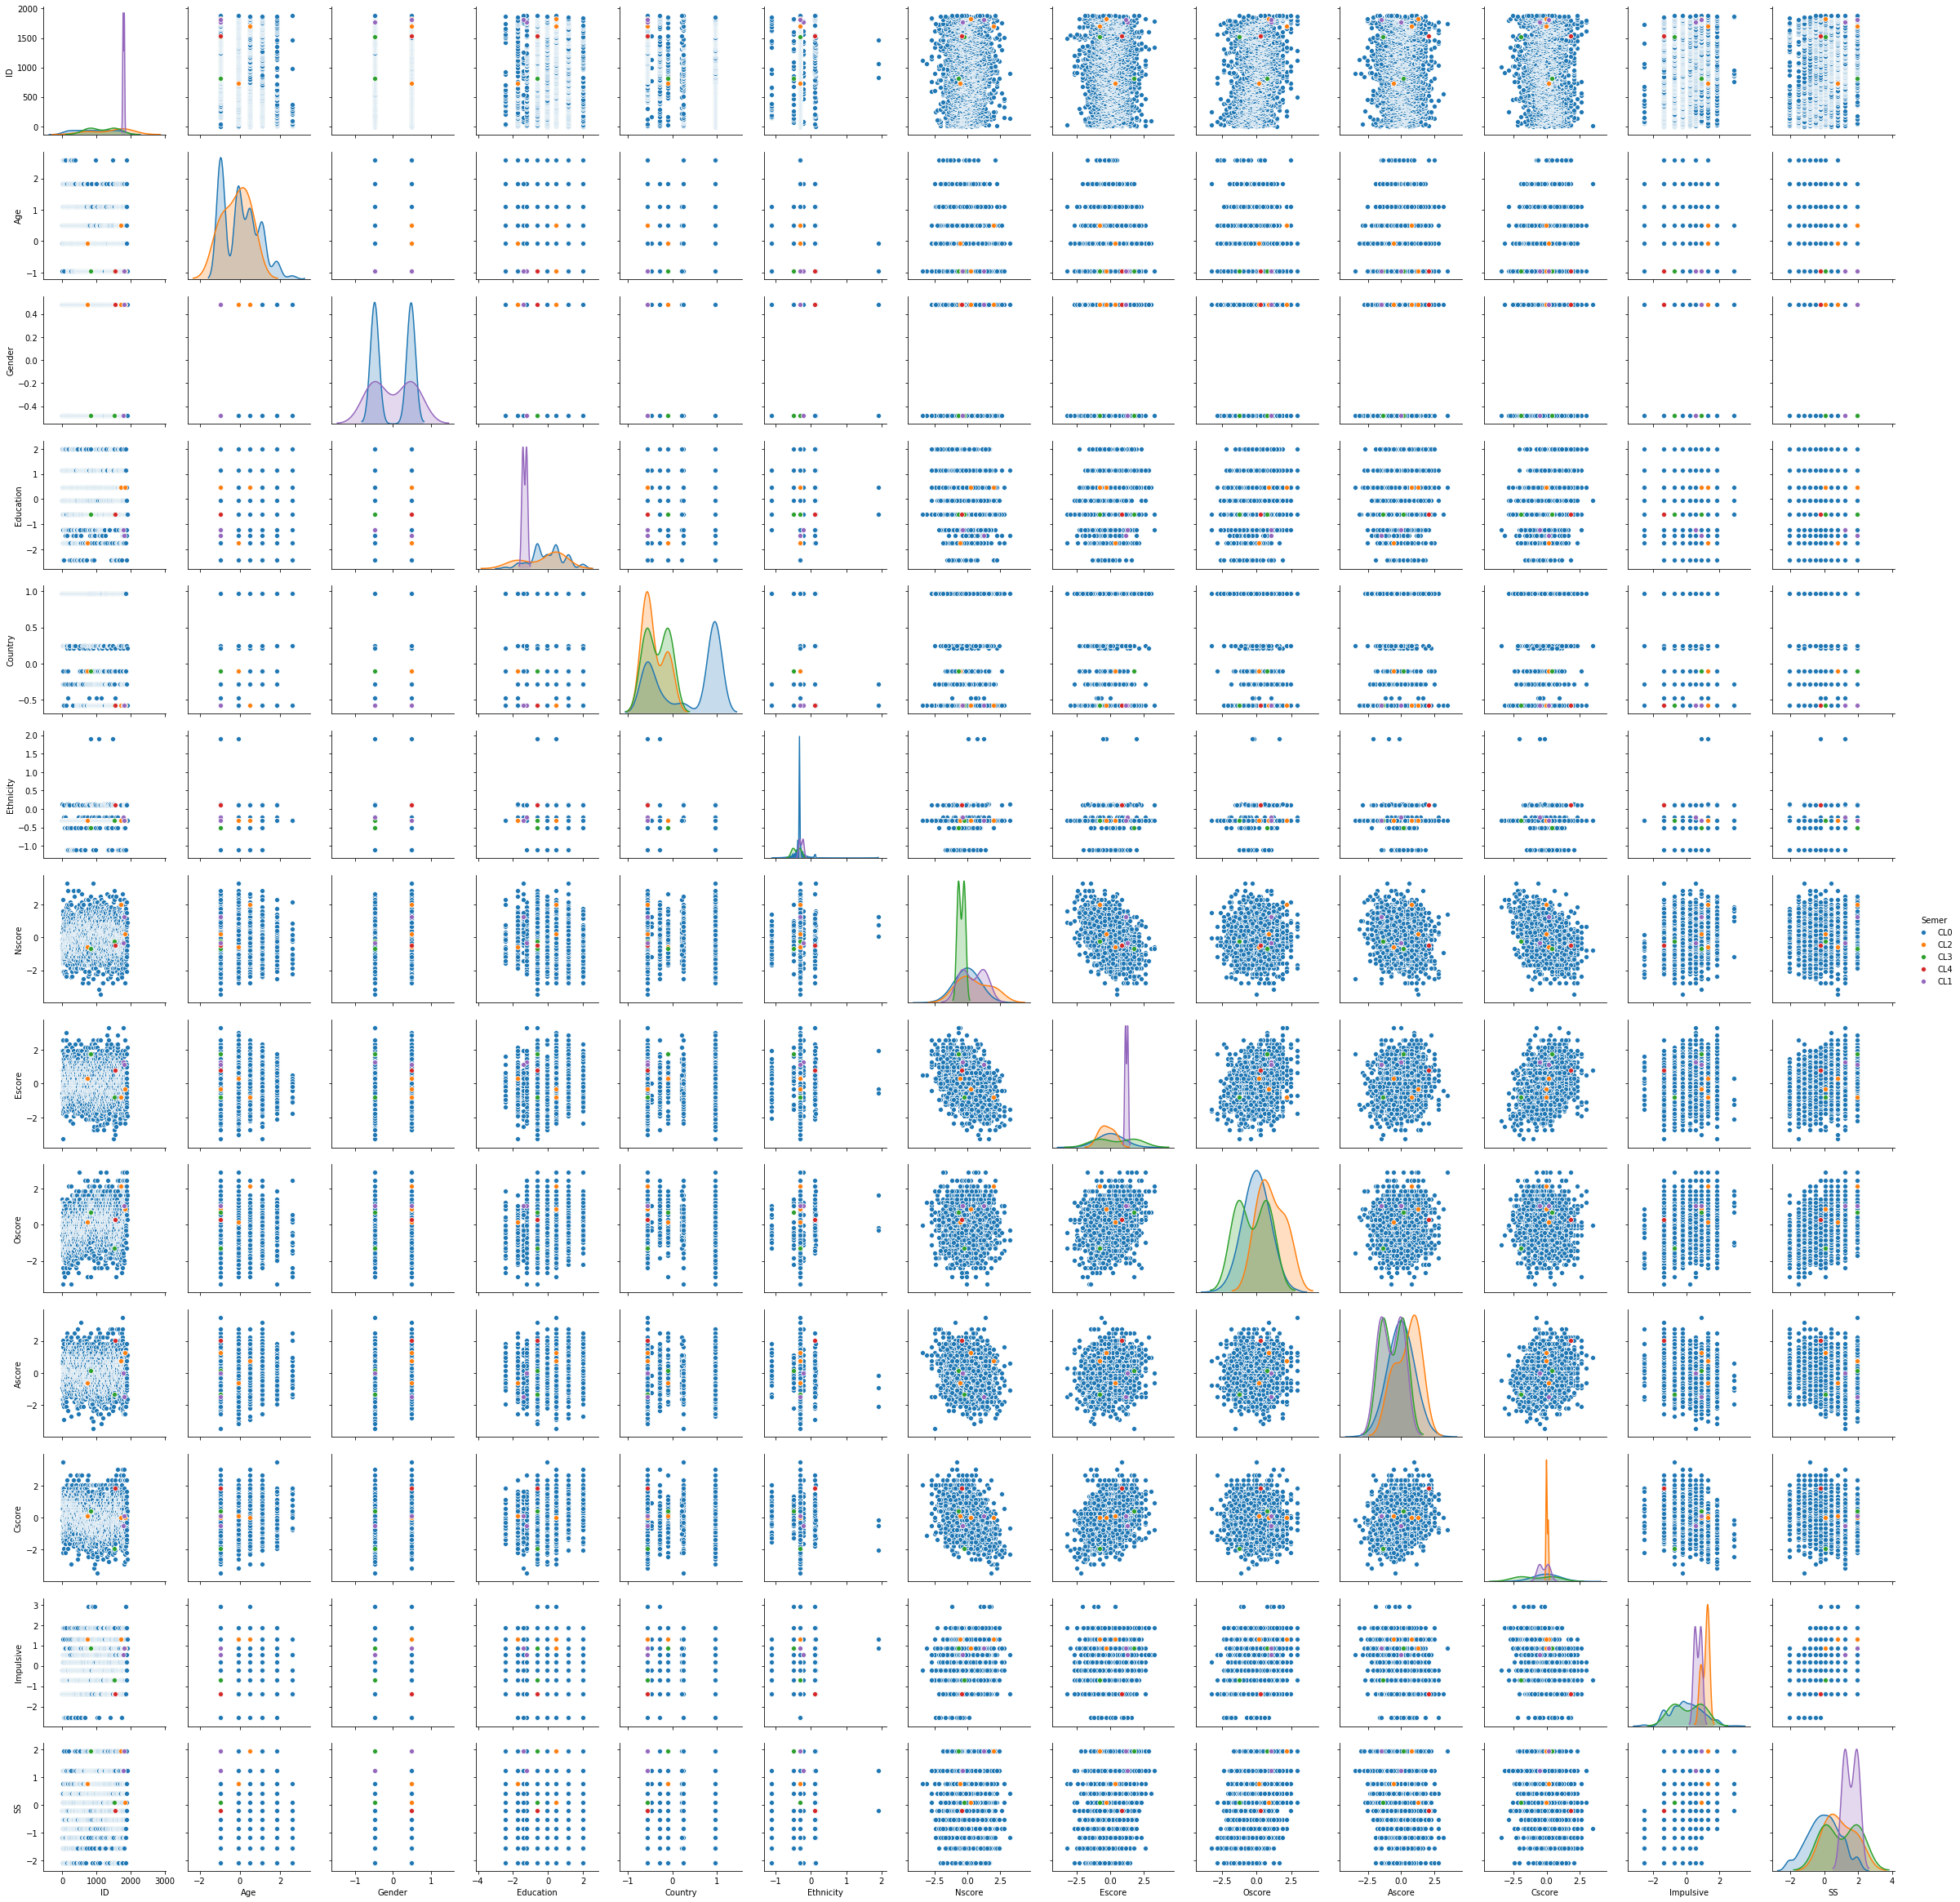

In [80]:
sn.pairplot(druguser, hue = "Semer")

In [81]:
names = {'CL0':0,'CL1':0,'CL2':0,'CL3':0,'CL4':0,'CL5':1,'CL6':1,0:0, 1:1}
druguser.Coke = druguser.Coke.map(names)
druguser.Coke.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Coke, dtype: int64

In [82]:
X = np.array(druguser[['Cscore','Escore']])
y = np.array(druguser['Coke'])

In [83]:
import numpy.random as rn

In [84]:
n = X.shape[0]
test = int(0.20*n)          
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       
y_test = y[:test]
X_train = X[test:]     
y_train = y[test:]

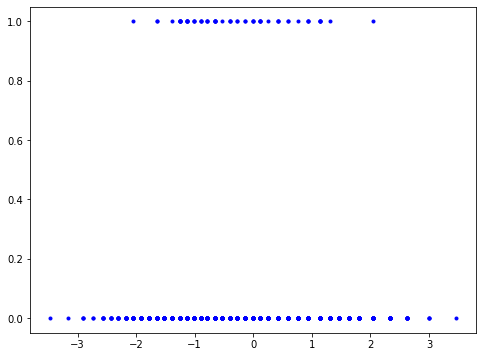

In [85]:
plt.figure(figsize = (8, 6))
plt.plot(X[:,0], y, 'b.');

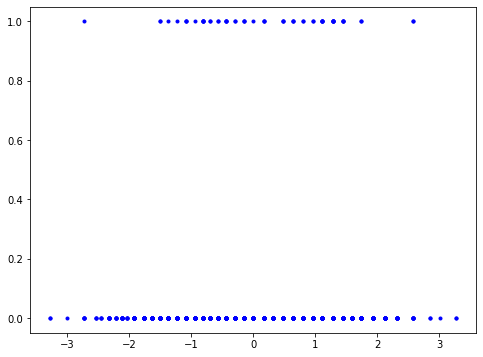

In [86]:
plt.figure(figsize = (8, 6))
plt.plot(X[:,1], y, 'b.');

In [87]:
from sklearn.linear_model import LogisticRegression
lgreg = LogisticRegression(solver='lbfgs')
lgreg.fit(X_train[:,1].reshape(-1,1), y_train);

In [88]:
b, m = *lgreg.intercept_, *lgreg.coef_[0]
b, m

(-3.4383798726761112, 0.0744943497446816)

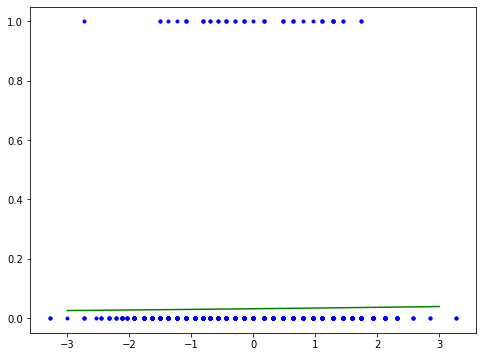

In [89]:
plt.figure(figsize = (8, 6))
plt.plot(X_train[:,1], y_train, 'b.')
xx = np.linspace(-3, 3, 100)
yy = np.exp(m*xx+b)/(1 + np.exp(m*xx+b))
plt.plot(xx, yy, 'g-');

In [90]:
lgreg.score(X_train[:,1].reshape(-1,1),y_train)

0.9688328912466844

In [91]:
lgreg.score(X_test[:,1].reshape(-1,1),y_test)

0.9655172413793104

# Homework 2 Explanation 
 To produce the results above, I looked at the pairplot with respect to the drug cocaine ("Coke") and tried to
 find attributes that may have some sort of corrolation. While there is no apparantly evident corrolation between
 any of the attributes, there seemed to be a very slight relationship between cscore (contentiousness) and nscorer
 (neuroticism). So, I made 2 plots: cscore vs. user/non-user of cocaine and nscore vs. user/non-user of cocaine 
 (note: for purposes of these graphs, I classified a "user" as anyone who has used cocaine within the last week.)
 Then, I attempted to use linear regression to find a decision boundary for cocaine user vs. nonuser. As we csn see
 in the plot above, this provides us with a very poor estimate, as the decision boundary is beyond the entirety of
the data set. The data for cocaine users tends to be in the center, so we could excpect that a linear model would
not perform well in this situation. Additionally, though about %97 of our data is correctly classified in both the
 testing and training sets, this is likely because more people are non-users of cocaine. In fact, only about %3 of
 the data were classified as a "user" so they were the only incorrectly classified in this case. In summary, though
it is a useful technique in some settings, linear regression is likely not the best predictor for this dataset.

# Homework 4-- Bootstraps and Cross Validation

In [92]:
# Cross Validation

n = X.shape[0]
test = int(0.20*n)          
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
R2 = pa.DataFrame( np.array([ [0]*5, [0]*5, [0]*5, [0]*5]).transpose(), columns = ['train_1', 'test_1', 'train_2', 'test_2'])


for k in range(5):
    X_test = X[k*test:(k+1)*test]       # Testing Sets
    y_test = y[k*test:(k+1)*test]
    X_train = np.concatenate( (X[:k*test], X[(k+1)*test:]), axis=0)     # Training Sets
    y_train = np.concatenate( (y[:k*test], y[(k+1)*test:]), axis=0)
    reg = LogisticRegression(solver = "lbfgs").fit(X_train, y_train)
    reg2 = LogisticRegression(solver = "lbfgs").fit(X_train[:, 0:6], y_train)
    
    R2.loc[k, 'train_1'] = reg.score(X_train, y_train)
    R2.loc[k, 'test_1'] = reg.score(X_test, y_test)
    R2.loc[k, 'train_2'] = reg2.score(X_train[:, 0:6], y_train)
    R2.loc[k, 'test_2'] = reg2.score(X_test[:, 0:6], y_test)

R2mean = [0]*4
R2std = [0]*4
for c in range(4):
    R2mean[c] = np.mean(R2.iloc[0:5, c])
    R2std[c] = np.std(R2.iloc[0:5, c])
    
R2 = R2.append( pa.Series(R2mean, index=R2.columns), ignore_index=True )
R2 = R2.append( pa.Series(R2std, index=R2.columns), ignore_index=True)
R2.index = [0, 1, 2, 3, 4, 'Mean', 'Standard Deviation']
R2

train_1    test_1   train_2    test_2
0                   0.969496  0.962865  0.969496  0.962865
1                   0.971485  0.954907  0.971485  0.954907
2                   0.967507  0.970822  0.967507  0.970822
3                   0.970159  0.960212  0.970159  0.960212
4                   0.962202  0.992042  0.962202  0.992042
Mean                0.968170  0.968170  0.968170  0.968170
Standard Deviation  0.003249  0.012995  0.003249  0.012995

In [93]:
sum(y_train)/len(y_train)

0.03779840848806366

In [94]:
# Bootstrapping

num = 40 # number of bootstraps to use
Xboot = [0]*num
yboot = [0]*num

n = X.shape[0]
for k in range(num):
    sample = np.random.randint(0, n, n)  # Note here starting with a random permutation is not necessary
    Xboot[k] = X[sample, :]
    yboot[k] = y[sample]
est = int(0.20*n)
R2 = pa.DataFrame( np.array([ [0]*num]*4).transpose(), columns = ['train_1', 'test_1', 'train_2', 'test_2'])

for k in range(num):
    X_test = Xboot[k][:test]
    y_test = yboot[k][:test]
    X_train = Xboot[k][test:]
    y_train = yboot[k][test:]
    reg = LogisticRegression(solver = "lbfgs").fit(X_train, y_train)
    reg2 = LogisticRegression(solver = "lbfgs").fit(X_train[:, 0:6], y_train)
    
    R2.loc[k, 'train_1'] = reg.score(X_train, y_train)
    R2.loc[k, 'test_1'] = reg.score(X_test, y_test)
    R2.loc[k, 'train_2'] = reg2.score(X_train[:, 0:6], y_train)
    R2.loc[k, 'test_2'] = reg2.score(X_test[:, 0:6], y_test)
    
R2mean = [0]*4
R2std = [0]*4
for c in range(4):
    R2mean[c] = np.mean(R2.iloc[0:5, c])
    R2std[c] = np.std(R2.iloc[0:5, c])
R2 = R2.append( pa.Series(R2mean, index=R2.columns), ignore_index=True )
R2 = R2.append( pa.Series(R2std, index=R2.columns), ignore_index=True)
R2.index = list(range(num)) + ['Mean', 'Standard Deviation']
R2.tail(10)

train_1    test_1   train_2    test_2
32                  0.972149  0.968170  0.972149  0.968170
33                  0.970159  0.954907  0.970159  0.954907
34                  0.970822  0.960212  0.970822  0.960212
35                  0.968833  0.973475  0.968833  0.973475
36                  0.972812  0.965517  0.972812  0.965517
37                  0.967507  0.968170  0.967507  0.968170
38                  0.969496  0.968170  0.969496  0.968170
39                  0.965517  0.970822  0.965517  0.970822
Mean                0.969496  0.964987  0.969496  0.964987
Standard Deviation  0.004594  0.007940  0.004594  0.007940

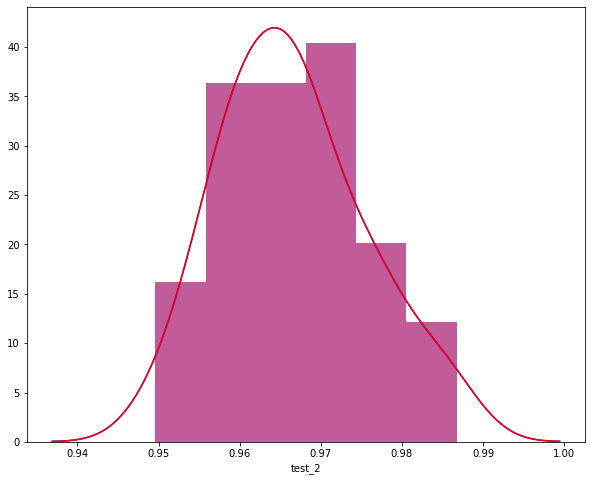

In [95]:
plt.figure(figsize = (10, 8))
sn.distplot(R2.iloc[:num, 1], color='blue')
f = sn.distplot(R2.iloc[:num, 3], color='red');
f = f.get_figure()
f.savefig('7.1.png')

# Homework 4 Explanation
Above, I implemented the methods of cross-validation and bootstraps to the drug data set, more specifically,  As we can see, both methods produced a seemingly good mean of about 97%. However, though this error is technically very small, this does not mean the method of logistic regression works well for this data set. As we saw in the last homework, only about 3% of the points in this data set were classified as cocaine users. So, using this logistic regression, all data would be classified as a non-user, but the error would still seem low. So, cross validation and bootstrapping has only confirmed that with these specific features, Logistic regression is likely not the best fit for this data set.

# Homework 5-- Principal Component Analysis

[0.26872948 0.19066403]


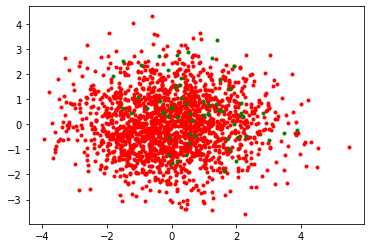

In [96]:
XX = np.array(druguser[['Cscore','Escore','Ascore','Nscore','Impulsive','Oscore','Age','Gender','Education','Ethnicity']])
y = np.array(druguser['Coke'])
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
XXpca = pca.fit_transform(XX);
plt.plot(XXpca[y==0, 0], XXpca[y==0, 1], 'r.')
plt.plot(XXpca[y==1, 0], XXpca[y==1, 1], 'g.');
print(pca.explained_variance_ratio_)

In [97]:
pca = PCA(n_components=4)
XXpca = pca.fit_transform(XX);
print(pca.explained_variance_ratio_)

[0.26872948 0.19066403 0.11608268 0.11399543]


In [98]:
n = XX.shape[0]
test = int(0.20*n)          
perm = rn.permutation(n)   
XX = XX[perm]
y = y[perm]
XX_test = XX[:test]       
y_test = y[:test]
XX_train = XX[test:]    
y_train = y[test:]
from sklearn.linear_model import LogisticRegression
cat1 = LogisticRegression(solver='lbfgs', multi_class='auto').fit(XX_train[:, 0:2], y_train)
cat1.score(XX_train[:, 0:2], y_train), cat1.score(XX_test[:, 0:2], y_test)

(0.9681697612732095, 0.9681697612732095)

In [99]:
import matplotlib.colors as pltco
def plot_cat_model(clf, XX_train, y_train, XX_test, y_test):
    h = .02
    x_min, x_max = XX_train[:, 0].min() - 1, XX_train[:, 0].max() + 1
    y_min, y_max = XX_train[:, 1].min() - 1, XX_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    cmap_light = pltco.ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = pltco.ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light);

    plt.scatter(XX_train[:, 0], XX_train[:, 1], c=y_train, cmap=cmap_bold,marker='o')
    plt.scatter(XX_test[:, 0], XX_test[:, 1], c=y_test, cmap=cmap_bold, marker='+');

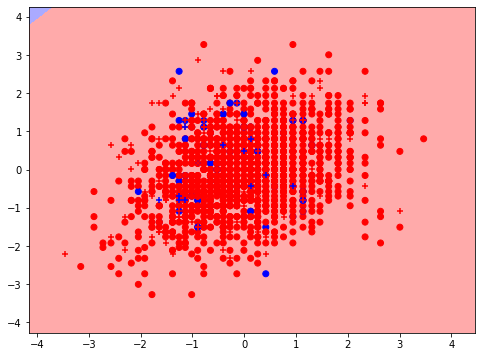

In [100]:
plot_cat_model(cat1, XX_train, y_train, XX_test, y_test)

In [101]:
pca = PCA(n_components=2)
XXpca_train = pca.fit_transform(XX_train)
XXpca_test = pca.transform(XX_test)

In [102]:
cat2 = LogisticRegression(solver='lbfgs', multi_class='auto').fit(XXpca_train, y_train)
cat2.score(XXpca_train, y_train), cat2.score(XXpca_test, y_test)

(0.9681697612732095, 0.9681697612732095)

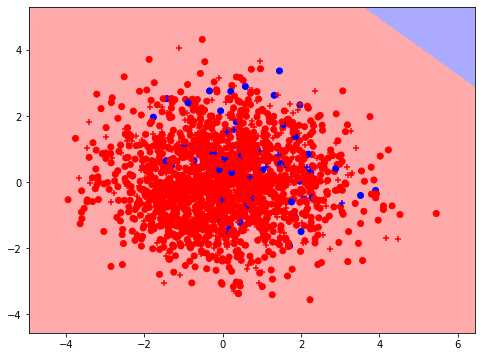

In [103]:
plot_cat_model(cat2, XXpca_train, y_train, XXpca_test, y_test)

# Homework 5 Explaination

For this homework, implemented the method of principal component analysis, as shown above. I started by using PCA to pick the linear combination of features with the strongest linear corrolation, then applied logistic regreesion again as we did in earlier assignments. As evident from the graph of both the PCA and of logistic regression, this was not very successful on this data set. Again, every single data point was classified as a non-cocaine user, likely due to the small fraction of this population that are users. This is also the reasoning behind the very low error-- like prevoius assignments, though the error seems very good at ~97%, this is just because only ~3% of the data are cocaine users and everyone is classified as a non-user. While based on the graph above PCA appears to get closer to finding some kind of decision boundary, this method still is not the right fit for this data set.

# Homework 6-- k-Nearest Neighbors

In [104]:
names = {'CL0':0,'CL1':0,'CL2':0,'CL3':0,'CL4':1,'CL5':1,'CL6':1,0:0, 1:1}
druguser.Cannabis = druguser.Cannabis.map(names)

X = np.array(druguser[['Cscore','Escore']])
y = np.array(druguser[['Cannabis']]).reshape(-1)

from sklearn.neighbors import KNeighborsClassifier
num = 10 
Xboot = [0]*num
yboot = [0]*num

n = X.shape[0]
for s in range(num):
    sample = np.random.randint(0, n, n) 
    Xboot[s] = X[sample, :]
    yboot[s] = y[sample]

test = int(0.20*n)
maxk = 20

labels = [ ['train_{}'.format(x), 'test_{}'.format(x)] for x in range(1, maxk+1)]
labels = [x for sublist in labels for x in sublist]

Error = pa.DataFrame(  np.array([0]*num*2*maxk).reshape(num, 2*maxk), columns = labels)

for s in range(num):
    X_test = Xboot[s][:test]
    y_test = yboot[s][:test]
    X_train = Xboot[s][test:]
    y_train = yboot[s][test:]
    
    for k in range(maxk):
        clf = KNeighborsClassifier(n_neighbors=k+1) 
        clf.fit(X_train, y_train) 
        Error.iloc[s, 2*k] = clf.score(X_train, y_train) 
        Error.iloc[s, 2*k+1] = clf.score(X_test, y_test)
      
Error_mean = [0]*2*maxk
Error_std = [0]*2*maxk
for c in range(2*maxk):
    Error_mean[c] = np.mean(Error.iloc[:num, c])
    Error_std[c] = np.std(Error.iloc[:num, c])
    
Error = Error.append( pa.Series(Error_mean, index=Error.columns), ignore_index=True)
Error = Error.append( pa.Series(Error_std, index=Error.columns), ignore_index=True)
Error.index = list(range(num)) + ['Mean', 'Standard Deviation']
Error.tail()
   

train_1    test_1   train_2    test_2   train_3  \
7                   0.811671  0.628647  0.779178  0.660477  0.793767   
8                   0.793767  0.726790  0.770557  0.713528  0.780504   
9                   0.773210  0.689655  0.766578  0.687003  0.775862   
Mean                0.789523  0.682228  0.774934  0.675332  0.786804   
Standard Deviation  0.011014  0.024962  0.009841  0.019998  0.010342   

                      test_3   train_4    test_4   train_5    test_5  ...  \
7                   0.607427  0.767241  0.578249  0.772546  0.575597  ...   
8                   0.700265  0.772546  0.663130  0.770557  0.671088  ...   
9                   0.679045  0.746021  0.700265  0.742706  0.687003  ...   
Mean                0.666578  0.763660  0.661804  0.764655  0.654111  ...   
Standard Deviation  0.029610  0.008803  0.039775  0.011302  0.031746  ...   

                    train_16   test_16  train_17   test_17  train_18  \
7                   0.701592  0.591512  0.697613  0.594164  0.688329   
8                   0.680371  0.668435  0.682361  0.684350  0.675066   
9                   0.669761  0.660477  0.674403  0.673740  0.663793   
Mean                0.676525  0.632626  0.679377  0.639788  0.672745   
Standard Deviation  0.013991  0.032078  0.012972  0.035544  0.010549   

                     test_18  train_19   test_19  train_20   test_20  
7                   0.586207  0.688329  0.599469  0.683687  0.580902  
8                   0.673740  0.663130  0.671088  0.655836  0.652520  
9                   0.663130  0.661804  0.668435  0.658488  0.657825  
Mean                0.635544  0.674337  0.640584  0.666844  0.629973  
Standard Deviation  0.035194  0.011411  0.029519  0.009323  0.027187  

[5 rows x 40 columns]

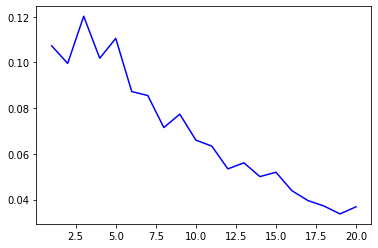

In [105]:
testing_error = np.array(Error_mean[1::2])
training_error = np.array(Error_mean[0::2])
s = abs(testing_error - training_error)
kk = range(1, maxk+1)
plt.plot(kk, s, 'b-');
plt.savefig('11.9.png')

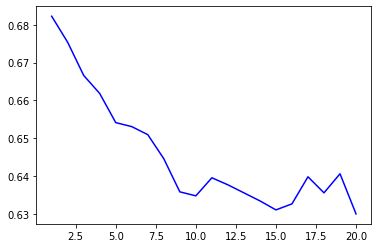

In [106]:
testing_error = Error_mean[1::2]
kk = range(1, maxk+1)
plt.plot(kk, testing_error, 'b-');
plt.savefig('11.9.png')

In [107]:
def plot_cat_model(clf, X_train, y_train, X_test, y_test):

    h = 0.1
    x_min, x_max = -5, 5
    y_min, y_max = -5, 5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    cmap_light = pltco.ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = pltco.ListedColormap(['#FF0000', '#00FF00'])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light);

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, marker='+');
    
    print('Training Error: {}'.format(clf.score(X_train, y_train)))
    print('Testing Error: {}'.format(clf.score(X_test, y_test)))

In [108]:
sum(druguser["Coke"]==1)

60

Training Error: 0.7075596816976127
Testing Error: 0.6949602122015915


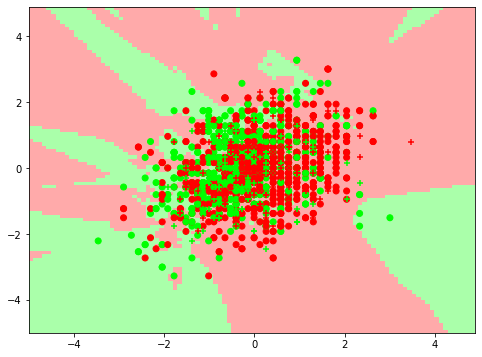

In [109]:
clf2 = KNeighborsClassifier(n_neighbors=8) 
clf2.fit(X_train, y_train)
plot_cat_model(clf2, X_train, y_train, X_test, y_test)
plt.savefig('11.7.png')

Training Error: 0.76657824933687
Testing Error: 0.6870026525198939


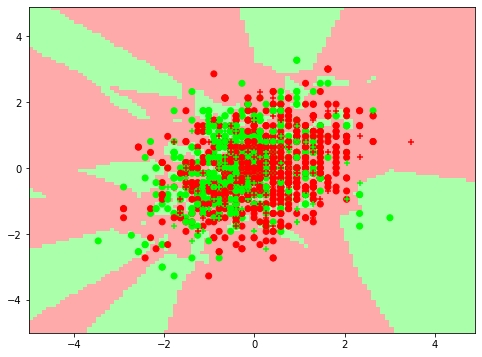

In [110]:
clf2 = KNeighborsClassifier(n_neighbors=2) 
clf2.fit(X_train, y_train)
plot_cat_model(clf2, X_train, y_train, X_test, y_test)
plt.savefig('11.7.png')

Training Error: 0.6584880636604774
Testing Error: 0.6578249336870027


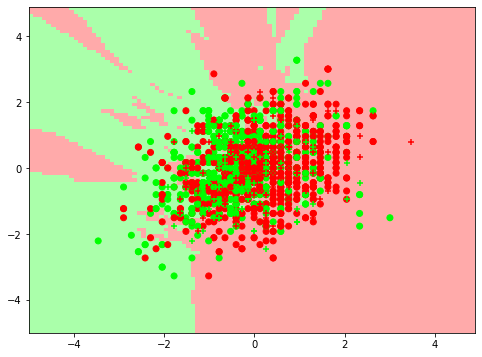

In [111]:
clf2 = KNeighborsClassifier(n_neighbors=20) 
clf2.fit(X_train, y_train)
plot_cat_model(clf2, X_train, y_train, X_test, y_test)
plt.savefig('11.7.png')

In [112]:
def plot_cat_model_nodata(clf):

    h = 0.1
    x_min, x_max = -5, 5
    y_min, y_max = -5, 5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    cmap_light = pltco.ListedColormap(['#FFAAAA', '#AAFFAA'])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light);
    

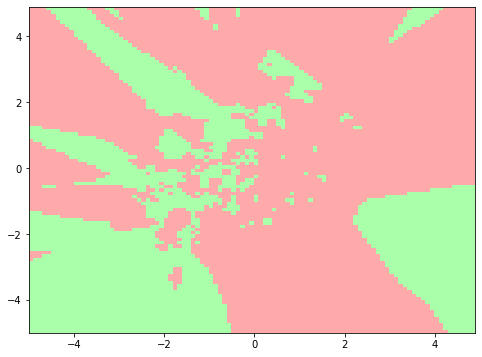

In [113]:
clf2 = KNeighborsClassifier(n_neighbors=8) 
clf2.fit(X_train, y_train)
plot_cat_model_nodata(clf2)
plt.savefig('11.7.png')

# Homework 6 Explaination:
For this homework, I implemented the k-nearest neighbors algorithm, as shown above. I used the drug Cannabis, as previous tests with a less common drug, cocaine, were not producing ideal results due to the small fraction of the data that were cocaine users. I decided to classify cannabis user vs. non-user using the 2 features "cscore" and "escore". I first started by bootstrapping for values of k 1-20, checking to see which gave me minimal error. Then, I plotted the average difference between the mean of the testing and training set. Looking at this, it seemed that a k of around 10 would perform the best. So, I tested 3 values for k; 2, 8, and 20. As we can see above, k=2 clearly overfits, k=20 seems to be too rigid of a model, and while k=8 doesnt work great, it seems to be the best middle-ground for this data set. Finally, I plotted k=8 without the data to see what the model actually looks like and as we cn see, it's extremely non-linear. In general, k-nearest neighbors, while not perfect, has worked far better than previous linear models attempted. This was to be expected, since the data is very clearly non-linear.

# Homework 7

### Quadratic Discriminent Analysis

Training Error: 0.6180371352785146
Testing Error: 0.623342175066313


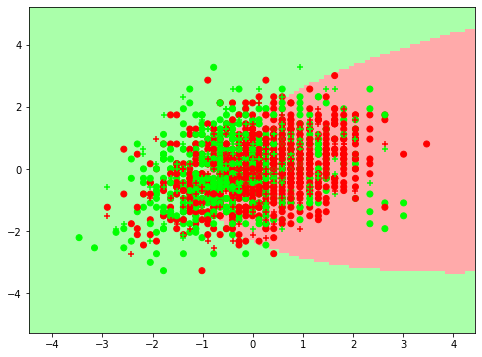

In [114]:
X = np.array(druguser[['Cscore','Escore']])
y = np.array(druguser[['Cannabis']]).reshape(-1)

def plot_cat_model(clf, X_train, y_train, X_test, y_test):

    h = 0.1 
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 2, X_train[:, 1].max() + 2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    cmap_light = pltco.ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = pltco.ListedColormap(['#FF0000', '#00FF00'])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light);

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, marker='+');
    
    print('Training Error: {}'.format(clf.score(X_train, y_train)))
    print('Testing Error: {}'.format(clf.score(X_test, y_test)))

n = X.shape[0]
test = int(0.20*n)           
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]  
y_test = y[:test]
X_train = X[test:]  
y_train = y[test:]

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf2 = QuadraticDiscriminantAnalysis()
clf2.fit(X_train, y_train)
plot_cat_model(clf2, X_train, y_train, X_test, y_test)
plt.savefig('13.10.png')

In [115]:
X = np.array(druguser[['Cscore','Escore','Age','Education','Ascore']])
y = np.array(druguser[['Cannabis']]).reshape(-1)

n = X.shape[0]
test = int(0.20*n)           
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]  
y_test = y[:test]
X_train = X[test:]  
y_train = y[test:]

clf2 = QuadraticDiscriminantAnalysis()
clf2.fit(X_train, y_train)

print('Training Error: {}'.format(clf2.score(X_train, y_train)))
print('Testing Error: {}'.format(clf2.score(X_test, y_test)))

Training Error: 0.7374005305039788
Testing Error: 0.7559681697612732


As we can see from the two results above, the X array with multiple variables performed significantly better than the X array with just 2 variables. Since our second test clearly diod better, I performed bootstrapping on it as shown below:

In [116]:
num = 50 
Xboot = [0]*num
yboot = [0]*num

n = X.shape[0]
for s in range(num):
    sample = np.random.randint(0, n, n) 
    Xboot[s] = X[sample, :]
    yboot[s] = y[sample]

test = int(0.20*n)

labels = ['train','test']

Error = pa.DataFrame(  np.array([0]*num*2).reshape(num, 2), columns = labels)

for s in range(num):
    X_test = Xboot[s][:test]
    y_test = yboot[s][:test]
    X_train = Xboot[s][test:]
    y_train = yboot[s][test:]
    
    clf2 = QuadraticDiscriminantAnalysis()
    clf2.fit(X_train, y_train)
    Error.iloc[s, 0] = clf2.score(X_train, y_train) 
    Error.iloc[s, 1] = clf2.score(X_test, y_test)
      
Error_mean = [0]*2
Error_std = [0]*2
for c in range(2):
    Error_mean[c] = np.mean(Error.iloc[:num, c])
    Error_std[c] = np.std(Error.iloc[:num, c])
    
Error = Error.append( pa.Series(Error_mean, index=Error.columns), ignore_index=True)
Error = Error.append( pa.Series(Error_std, index=Error.columns), ignore_index=True)
Error.index = list(range(num)) + ['Mean', 'Standard Deviation']
Error.tail()
   

train      test
47                  0.740716  0.726790
48                  0.761936  0.726790
49                  0.712202  0.745358
Mean                0.738992  0.729125
Standard Deviation  0.012504  0.025917

From this bootstrapping procedure above, we can see that the test and train mean were nearly identical at about 73%. This means the model performed exceptionally in terms of not overfitting, and 73% correct is one of the best models so far. 

### Support Vector Machines

In [117]:
def plot_cat_model_3(clf, X_train, y_train, X_test, y_test):
    
    h = 0.1 
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 2, X_train[:, 1].max() + 2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    cmap_light = pltco.ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = pltco.ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light);

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, marker='+');
    
    print('Training Error: {}'.format(clf.score(X_train, y_train)))
    print('Testing Error: {}'.format(clf.score(X_test, y_test)))

In [118]:
X = np.array(druguser[['Cscore','Escore']])
y = np.array(druguser[['Cannabis']]).reshape(-1)

n = X.shape[0]
test = int(0.20*n)  
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]   
y_test = y[:test]
X_train = X[test:]   
y_train = y[test:]

In [119]:
from sklearn.svm import SVC

Training Error: 0.6213527851458885
Testing Error: 0.6339522546419099


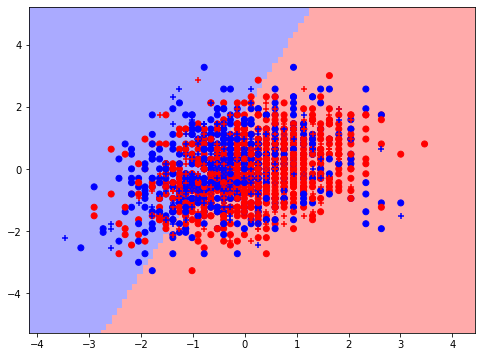

In [120]:
sv = SVC(C=1, gamma='scale', kernel='linear')
sv.fit(X_train, y_train)
plot_cat_model_3(sv, X_train, y_train, X_test, y_test)
plt.savefig('13.16.png')

Training Error: 0.580238726790451
Testing Error: 0.5888594164456233


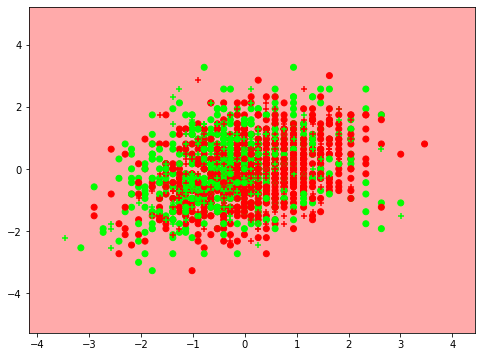

In [121]:
sv = SVC(C=2, gamma='scale', kernel='poly')
sv.fit(X_train, y_train)
plot_cat_model(sv, X_train, y_train, X_test, y_test)
plt.savefig('13.18.png')

Training Error: 0.6492042440318302
Testing Error: 0.6286472148541115


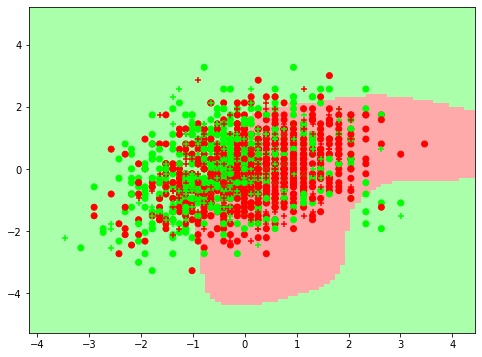

In [122]:
sv = SVC(C=2, gamma='scale', kernel='rbf')
sv.fit(X_train, y_train)
plot_cat_model(sv, X_train, y_train, X_test, y_test)
plt.savefig('13.19.png')

Of the three support vector machine models above, it seems clear that the model where the kernel was 'rbf' worked the best-- so, I continued testing this using bootstrapping below: 

In [123]:
num = 50 
Xboot = [0]*num
yboot = [0]*num

n = X.shape[0]
for s in range(num):
    sample = np.random.randint(0, n, n) 
    Xboot[s] = X[sample, :]
    yboot[s] = y[sample]

test = int(0.20*n)

labels = ['train','test']

Error = pa.DataFrame(  np.array([0]*num*2).reshape(num, 2), columns = labels)

for s in range(num):
    X_test = Xboot[s][:test]
    y_test = yboot[s][:test]
    X_train = Xboot[s][test:]
    y_train = yboot[s][test:]
    
    clf2 = SVC(C=2, gamma='scale', kernel='rbf')
    clf2.fit(X_train, y_train)
    Error.iloc[s, 0] = clf2.score(X_train, y_train) 
    Error.iloc[s, 1] = clf2.score(X_test, y_test)
      
Error_mean = [0]*2
Error_std = [0]*2
for c in range(2):
    Error_mean[c] = np.mean(Error.iloc[:num, c])
    Error_std[c] = np.std(Error.iloc[:num, c])
    
Error = Error.append( pa.Series(Error_mean, index=Error.columns), ignore_index=True)
Error = Error.append( pa.Series(Error_std, index=Error.columns), ignore_index=True)
Error.index = list(range(num)) + ['Mean', 'Standard Deviation']
Error.tail()
   

train      test
47                  0.637268  0.612732
48                  0.651857  0.625995
49                  0.654509  0.631300
Mean                0.647334  0.633316
Standard Deviation  0.009227  0.024721

As we can see from this bootstrapping procedure, this model also performed very well in terms of minimal overfitting, with the difference between testing abd training being about 1%

# Homework 7 Explaination:
Using the results above, we can see that quadratic discriminent analysis is likely the better of these two algorithms for this particular data set. Using bootstrapping, we can see that it overall performed 10% better than support vector machines, which in terms of data science, is a huge difference. Additionally, quadratic discriminent analysis seemed to overfit slightly less than support vector machines, giving it another slight leg-up. Overall, both of these algotrithms performed better than many of the previous, but quadratic discriminent analysis is by far the best fit for this data set so far. 